In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Считываем данные:
data = load_boston()
X = data.data
y = data.target
parameters = data.feature_names

In [5]:
# Собираем исходные параметры и стоимость в один DataFrame:
df = pd.DataFrame(X, columns=parameters)
df['MEDV'] = y

In [6]:
# Делим данные на учебную и тестовую части:
test = df.sample(frac=0.2)
train = df.drop(test.index)

In [7]:
# Отделяем искомые значения от параметров:
y_test = test.pop('MEDV')
y_train = train.pop('MEDV')

In [8]:
# Создаем модель и передаем ей весь набор учебных данных:
lr = LinearRegression()
lr.fit(train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Смотрим на коэффициенты полученной модели линейной регрессии:
print('Intercept =', lr.intercept_)

Intercept = 32.92227135363534


In [10]:
print('\nLinear coefficients:')
for par, coef in zip(parameters, lr.coef_):
    print(f'\t{par}: {coef}')


Linear coefficients:
	CRIM: -0.09539510156829677
	ZN: 0.03671555661212643
	INDUS: 0.038047159495903565
	CHAS: 1.5125617205444868
	NOX: -16.05637609446647
	RM: 4.142512096120976
	AGE: -0.003661883627830896
	DIS: -1.3175591106129916
	RAD: 0.2518026922267606
	TAX: -0.010960392476492255
	PTRATIO: -1.0020313552073572
	B: 0.010396521970744067
	LSTAT: -0.4730879137496496


In [11]:
# Среднеквадратичная ошибка модели при использовании всех параметров:
MSE = -cross_val_score(lr, train, y_train, cv=10, scoring='neg_mean_squared_error')

In [12]:
print('\nКросс-валидация на учебной выборке (при использовании всех параметров):')
print('\tMSE:', MSE.mean())
print('\tRMSE:', np.sqrt(MSE).mean())


Кросс-валидация на учебной выборке (при использовании всех параметров):
	MSE: 32.67593153457712
	RMSE: 5.087064396729068


In [13]:
# Делаем прогноз на тестовых данных:
prediction = lr.predict(test)

In [14]:
print('\nТочность модели на тестовой выборке:')
print('\tMAE:', metrics.mean_absolute_error(y_test, prediction))
print('\tMSE:', metrics.mean_squared_error(y_test, prediction))
print('\tRMSE:', np.sqrt(metrics.mean_absolute_error(y_test, prediction)))


Точность модели на тестовой выборке:
	MAE: 3.2473953352732363
	MSE: 23.604478830648766
	RMSE: 1.802053088916427


In [15]:
%matplotlib inline

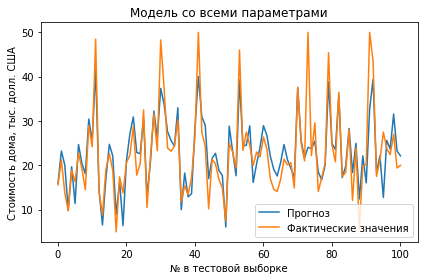

In [16]:
# График фактической и оцениваемой стоимости дома для тестовых данных:
plt.plot(range(len(prediction)), prediction, label='Прогноз')
plt.plot(range(len(prediction)), y_test, label='Фактические значения')
plt.ylabel('Стоимость дома, тыс. долл. США')
plt.xlabel('№ в тестовой выборке')
plt.legend()
plt.title('Модель со всеми параметрами')
plt.tight_layout()

In [17]:
# Вычисляем ошибку для каждого прогнозного значения:
errors = (prediction - y_test) / y_test * 100

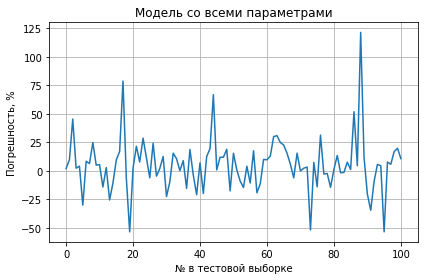

In [18]:
plt.plot(range(len(prediction)), errors)
plt.grid()
plt.ylabel('Погрешность, %')
plt.xlabel('№ в тестовой выборке')
plt.title('Модель со всеми параметрами')
plt.tight_layout()

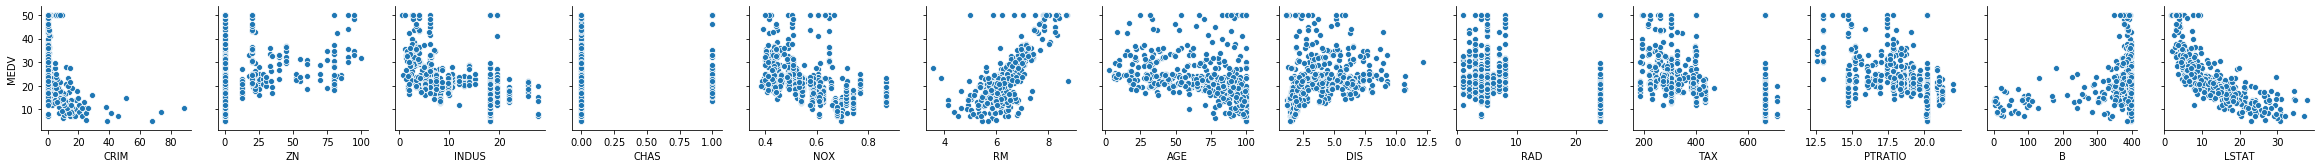

In [19]:
# График корреляции стоимости и других параметров:
sns.pairplot(df, x_vars=parameters, y_vars='MEDV')

In [20]:
print('\nКорреляция стоимости с другими параметрами:')
for i in range(len(parameters)):
    corr = np.corrcoef(X.T[i], y.reshape((1, -1)))
    print(f'\tКорреляция с {parameters[i]}:, {corr[0, 1]}')


Корреляция стоимости с другими параметрами:
	Корреляция с CRIM:, -0.38830460858681165
	Корреляция с ZN:, 0.36044534245054305
	Корреляция с INDUS:, -0.4837251600283728
	Корреляция с CHAS:, 0.17526017719029846
	Корреляция с NOX:, -0.42732077237328264
	Корреляция с RM:, 0.6953599470715393
	Корреляция с AGE:, -0.3769545650045963
	Корреляция с DIS:, 0.24992873408590394
	Корреляция с RAD:, -0.3816262306397781
	Корреляция с TAX:, -0.46853593356776724
	Корреляция с PTRATIO:, -0.5077866855375622
	Корреляция с B:, 0.33346081965706653
	Корреляция с LSTAT:, -0.737662726174015


In [21]:
# Убираем параметры с наименьшей величиной корреляции:
train.drop(['CHAS', 'DIS'], axis='columns', inplace=True)
test.drop(['CHAS', 'DIS'], axis='columns', inplace=True)

In [22]:
# Переобучаем модель:
lr.fit(train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print('\nIntercept =', lr.intercept_)


Intercept = 21.02353331587996


In [24]:
print('\nLinear coefficients:')
for par, coef in zip(parameters, lr.coef_):
    print(f'\t{par}: {coef}')


Linear coefficients:
	CRIM: -0.0657165460407038
	ZN: -0.0012361634457650553
	INDUS: 0.13087483542612913
	CHAS: -8.6316549643828
	NOX: 4.5676539893932375
	RM: 0.022895337707965598
	AGE: 0.26028794912505115
	DIS: -0.011897059959272146
	RAD: -1.1162723123089788
	TAX: 0.011187942756881657
	PTRATIO: -0.48821236163003684


In [25]:
# Среднеквадратичная ошибка модели при ограниченном перечне параметров:
MSE = -cross_val_score(lr, train, y_train, cv=10, scoring='neg_mean_squared_error')

In [26]:
print('\nКросс-валидация на учебной выборке (при ограниченном перечне параметров):')
print('\tMSE:', MSE.mean())
print('\tRMSE:', np.sqrt(MSE).mean())


Кросс-валидация на учебной выборке (при ограниченном перечне параметров):
	MSE: 35.318634507581876
	RMSE: 5.289211914640868


In [27]:
# Делаем прогноз на тестовых данных:
prediction = lr.predict(test)

In [28]:
print('\nТочность модели на тестовой выборке:')
print('\tMAE:', metrics.mean_absolute_error(y_test, prediction))
print('\tMSE:', metrics.mean_squared_error(y_test, prediction))
print('\tRMSE:', np.sqrt(metrics.mean_absolute_error(y_test, prediction)))


Точность модели на тестовой выборке:
	MAE: 3.60780752818472
	MSE: 29.146439235391004
	RMSE: 1.899422946103558


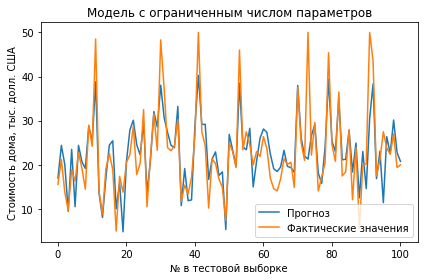

In [29]:
# График фактической и оцениваемой стоимости дома для тестовых данных:
plt.plot(range(len(prediction)), prediction, label='Прогноз')
plt.plot(range(len(prediction)), y_test, label='Фактические значения')
plt.ylabel('Стоимость дома, тыс. долл. США')
plt.xlabel('№ в тестовой выборке')
plt.legend()
plt.title('Модель с ограниченным числом параметров')
plt.tight_layout()

In [30]:
# Вычисляем ошибку для каждого прогнозного значения:
errors = (prediction - y_test) / y_test * 100

Text(0.5, 1.0, 'Модель с ограниченным числом параметров')

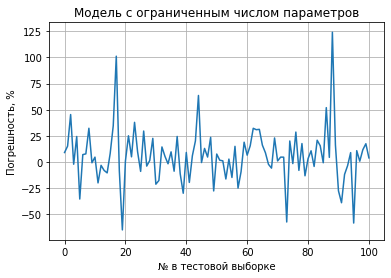

In [31]:
plt.plot(range(len(prediction)), errors)
plt.grid()
plt.ylabel('Погрешность, %')
plt.xlabel('№ в тестовой выборке')
plt.title('Модель с ограниченным числом параметров')

Вывод: модель с использованием всех доступных параметров показывает более высокую точность оценки стоимости дома.